## Nicholas Gaty

## Crime in Austin
https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu/about_data

Starting off, lets import any modules we might need.

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
import os
import sys
import folium
from folium import plugins
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')
import sklearn



In [3]:
data = pd.read_csv('Crime_Reports.csv')

In [4]:
# display na vales
display(data.isnull().sum())


Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 137
Occurred Date                        0
Occurred Time                       60
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    18910
Address                             12
Zip Code                          9007
Council District                 39499
APD Sector                        3318
APD District                      3986
PRA                               5508
Census Tract                     17068
Clearance Status                615648
Clearance Date                  347234
UCR Category                   1544243
Category Description           1544243
X-coordinate                      4979
Y-coordinate                      4972
Latitude                         37660
Longitude                

## Data Cleaning

Firstly, we will clean our data.

In [5]:
#create datetime objects
data['report_dt'] = pd.to_datetime(data['Report Date Time'],format='%m/%d/%Y %I:%M:%S %p')
data['occured_dt'] = pd.to_datetime(data['Occurred Date Time'],format='%m/%d/%Y %I:%M:%S %p')
# remove any data we DONT want.
toDrop = ["Highest Offense Code", "X-coordinate", "Y-coordinate", "Occurred Time","Occurred Date","Report Date","Report Time","UCR Category", "Location"]
data.drop(toDrop, inplace=True, axis=1)
data = data[data['report_dt'].isnull() == False]
data = data[data['occured_dt'].isnull() == False]



In [6]:
data.dtypes

Incident Number                         int64
Highest Offense Description            object
Family Violence                        object
Occurred Date Time                     object
Report Date Time                       object
Location Type                          object
Address                                object
Zip Code                              float64
Council District                      float64
APD Sector                             object
APD District                           object
PRA                                    object
Census Tract                          float64
Clearance Status                       object
Clearance Date                         object
Category Description                   object
Latitude                              float64
Longitude                             float64
report_dt                      datetime64[ns]
occured_dt                     datetime64[ns]
dtype: object

# EDA 

Going forward, we will now analyze the interactions of data and see what we can deduce.

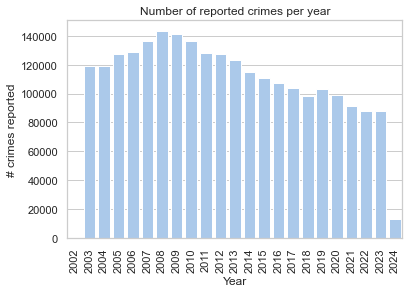

In [7]:
crimes_per_year = data['report_dt'].dt.year.value_counts().sort_index()

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

g = sns.barplot(x=crimes_per_year.index, y=crimes_per_year.values,color='b')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set(xlabel='Year', ylabel='# crimes reported')
plt.title('Number of reported crimes per year')
plt.show()

As we can see above, it appears to be our maximum is 2008, only 1 entry in 2002, and then a few so far in 2024. It seemed to rise to 2008, and been on the decrease ever since.

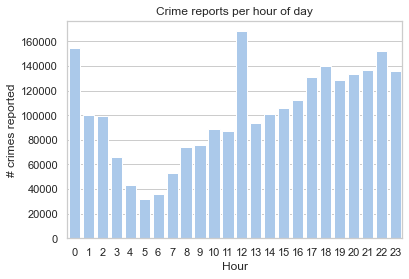

In [8]:
crimes_per_tod = data['occured_dt'].dt.hour.value_counts().sort_index()
g = sns.barplot(x=crimes_per_tod.index, y=crimes_per_tod.values, color='b')
g.set(xlabel='Hour', ylabel='# crimes reported')
plt.title('Crime reports per hour of day')
plt.show()

The peak time for crime is noon. It then decreases only to increase up untill midnight, where it decreases again untill 5 am - 6am where increasing occurs again.

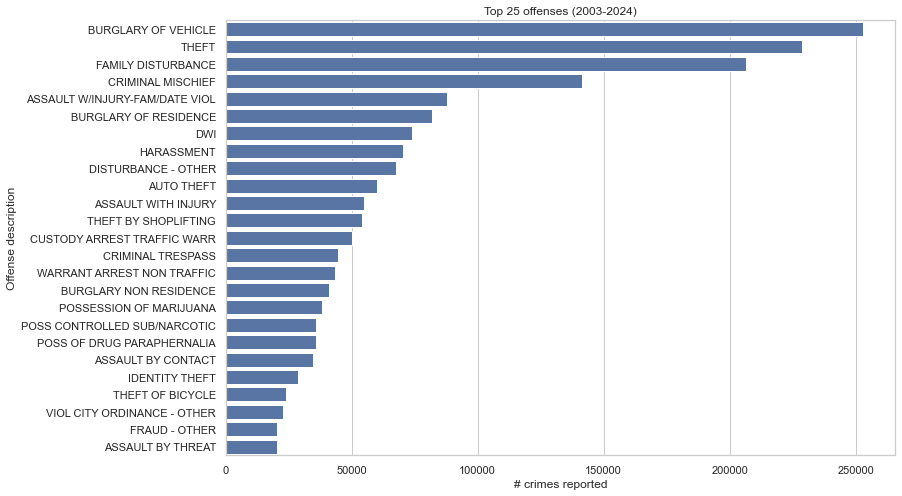

In [9]:
top_crimes = data['Highest Offense Description'].value_counts().head(25)
sns.set(rc={'figure.figsize':(12,8)},style="whitegrid")
g = sns.barplot(y=top_crimes.index, x=top_crimes.values,color='b')
g.set(xlabel='# crimes reported', ylabel='Offense description')
plt.title('Top 25 offenses (2003-2024)')
plt.show()

We now see that for our time period, stealing things from a vehicle is the most common crime, followed by plain theft.

In [10]:
# the follow allows us to create heat map coords, we will do this for the top 10 crimes.
vehicle_theft = data[(data['Latitude'].isnull() == False) 
                  & (data['Longitude'].isnull() == False)
                 & (data['Highest Offense Description'] == 'BURGLARY OF VEHICLE')
                 & (data['report_dt'].dt.year == 2018)][['Latitude','Longitude']]
theft = data[(data['Latitude'].isnull() == False) 
                  & (data['Longitude'].isnull() == False)
                 & (data['Highest Offense Description'] == 'THEFT')
                 & (data['report_dt'].dt.year == 2018)][['Latitude','Longitude']]
family_distr = data[(data['Latitude'].isnull() == False) 
                  & (data['Longitude'].isnull() == False)
                 & (data['Highest Offense Description'] == 'FAMILY DISTURBANCE')
                 & (data['report_dt'].dt.year == 2018)][['Latitude','Longitude']]
criminal_misch = data[(data['Latitude'].isnull() == False) 
                  & (data['Longitude'].isnull() == False)
                 & (data['Highest Offense Description'] == 'CRIMINAL MISCHIEF')
                 & (data['report_dt'].dt.year == 2018)][['Latitude','Longitude']]
assault_winj = data[(data['Latitude'].isnull() == False) 
                  & (data['Longitude'].isnull() == False)
                 & (data['Highest Offense Description'] == 'ASSAULT W/INJURY-FAM/DATE VIOL')
                 & (data['report_dt'].dt.year == 2018)][['Latitude','Longitude']]
burg_resi = data[(data['Latitude'].isnull() == False) 
                  & (data['Longitude'].isnull() == False)
                 & (data['Highest Offense Description'] == 'BURGLARY OF RESIDENCE')
                 & (data['report_dt'].dt.year == 2018)][['Latitude','Longitude']]
dwi = data[(data['Latitude'].isnull() == False) 
                  & (data['Longitude'].isnull() == False)
                 & (data['Highest Offense Description'] == 'DWI')
                 & (data['report_dt'].dt.year == 2018)][['Latitude','Longitude']]
harassment = data[(data['Latitude'].isnull() == False) 
                  & (data['Longitude'].isnull() == False)
                 & (data['Highest Offense Description'] == 'HARASSMENT')
                 & (data['report_dt'].dt.year == 2018)][['Latitude','Longitude']]
distr_other = data[(data['Latitude'].isnull() == False) 
                  & (data['Longitude'].isnull() == False)
                 & (data['Highest Offense Description'] == 'DISTURBANCE - OTHER')
                 & (data['report_dt'].dt.year == 2018)][['Latitude','Longitude']]
auto_thet = data[(data['Latitude'].isnull() == False) 
                  & (data['Longitude'].isnull() == False)
                 & (data['Highest Offense Description'] == 'AUTO THEFT')
                 & (data['report_dt'].dt.year == 2018)][['Latitude','Longitude']]


In [11]:
map_1 = folium.Map(location=[30.285516,-97.736753 ],tiles='OpenStreetMap', zoom_start=11)
map_1.add_child(plugins.HeatMap(vehicle_theft[['Latitude', 'Longitude']].values, radius=15))
map_1

In [12]:
map_2 = folium.Map(location=[30.285516,-97.736753 ],tiles='OpenStreetMap', zoom_start=11)
map_2.add_child(plugins.HeatMap(theft[['Latitude', 'Longitude']].values, radius=15))
map_2

In [13]:
map_3 = folium.Map(location=[30.285516,-97.736753 ],tiles='OpenStreetMap', zoom_start=11)
map_3.add_child(plugins.HeatMap(family_distr[['Latitude', 'Longitude']].values, radius=15))
map_3

In [14]:
map_4 = folium.Map(location=[30.285516,-97.736753 ],tiles='OpenStreetMap', zoom_start=11)
map_4.add_child(plugins.HeatMap(criminal_misch[['Latitude', 'Longitude']].values, radius=15))
map_4

In [15]:
map_5 = folium.Map(location=[30.285516,-97.736753 ],tiles='OpenStreetMap', zoom_start=11)
map_5.add_child(plugins.HeatMap(assault_winj[['Latitude', 'Longitude']].values, radius=15))
map_5

In [16]:
map_6 = folium.Map(location=[30.285516,-97.736753 ],tiles='OpenStreetMap', zoom_start=11)
map_6.add_child(plugins.HeatMap(burg_resi[['Latitude', 'Longitude']].values, radius=15))
map_6

In [17]:
map_7 = folium.Map(location=[30.285516,-97.736753 ],tiles='OpenStreetMap', zoom_start=11)
map_7.add_child(plugins.HeatMap(dwi[['Latitude', 'Longitude']].values, radius=15))
map_7

In [18]:
map_8 = folium.Map(location=[30.285516,-97.736753 ],tiles='OpenStreetMap', zoom_start=11)
map_8.add_child(plugins.HeatMap(harassment[['Latitude', 'Longitude']].values, radius=15))
map_8

In [19]:
map_9 = folium.Map(location=[30.285516,-97.736753 ],tiles='OpenStreetMap', zoom_start=11)
map_9.add_child(plugins.HeatMap(distr_other[['Latitude', 'Longitude']].values, radius=15))
map_9

In [20]:
map_2 = folium.Map(location=[30.285516,-97.736753 ],tiles='OpenStreetMap', zoom_start=11)
map_2.add_child(plugins.HeatMap(auto_thet[['Latitude', 'Longitude']].values, radius=15))
map_2

With these maps, we can now directly and accurately analyze the crimes and where they occur, as well as how often, which can be seen as a cool blue for not as much, and a hot red for high frequency. Lets comment on them

Burglary of Vehicle - A lot of the crime appears to be more dense in the north parts of Austin.
 A large line of crime can also be seen at east 7th street (north of the colorado river)

Theft - This map is much more warm, which hints of orange and red apeparing nearly everyhwere, while it seems the Univeristy of Texas
seems to have almost no theft, campus police could likely be prominent.

Family Distrubance - More prominent in south parts of Austin and far north of Austin's borders.

Criminal Mischief - Heart of this act is at the center of Austin, and stays consistent as we go both north and south.

Assault W/Injury - Hot spots seem to be near south east Austin and far north of Austin. Not as much in Austin directly.

Burglary of residence - Not really seen in Austin at all. Most fart south and north of Austin.

DWI - Occurs most on our busy streets, such as east 7th, and the streets around it.

Harassment - Most seen in central Austin and just south east of the city. Decently scattered elswhere.

Disturbance - Other - Most seeen in Austin and just a few minutes north. Popular as well far south and north.

Auto Theft - Popular just a few minutes north of Austin, west of the university.

From this map we can also conclude that not a lot of crimes occur on the campus of the University of Texas-Austin, and a lot of crimes occur near
east 7th street, along with 5th and 6th street.



In [21]:
data.dtypes

Incident Number                         int64
Highest Offense Description            object
Family Violence                        object
Occurred Date Time                     object
Report Date Time                       object
Location Type                          object
Address                                object
Zip Code                              float64
Council District                      float64
APD Sector                             object
APD District                           object
PRA                                    object
Census Tract                          float64
Clearance Status                       object
Clearance Date                         object
Category Description                   object
Latitude                              float64
Longitude                             float64
report_dt                      datetime64[ns]
occured_dt                     datetime64[ns]
dtype: object

Now lets see how the variables interact with eachother:

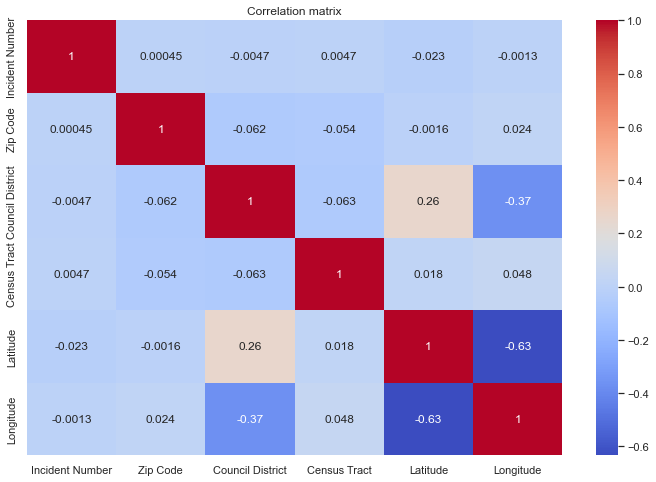

In [22]:
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation matrix')
plt.show()


There really isnt much of a correlation. The largest ones we can see are between Latitude and Council District, and thats it. There is not much correlation amongst the numerical variables.

Lets furthermore look into where crimes are occuring the most.

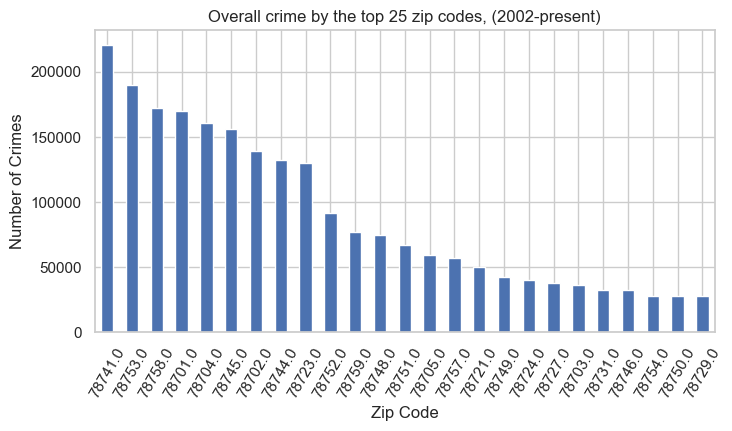

In [23]:
plt.figure(figsize=(8, 4), dpi=100)
data["Zip Code"].value_counts().head(25).plot.bar(rot=60)
plt.title("Overall crime by the top 25 zip codes, (2002-present)")
plt.xlabel("Zip Code")
plt.ylabel("Number of Crimes")
plt.show()



As we can see, we recieved 78741 to be where most of the crimes happen. Lets use this going forward. This region is south of the Colorado river and south east of central Austin, just outside of downtown

Lets filter down.

In [24]:
df_78741 = data[data['Zip Code'] == 78741]


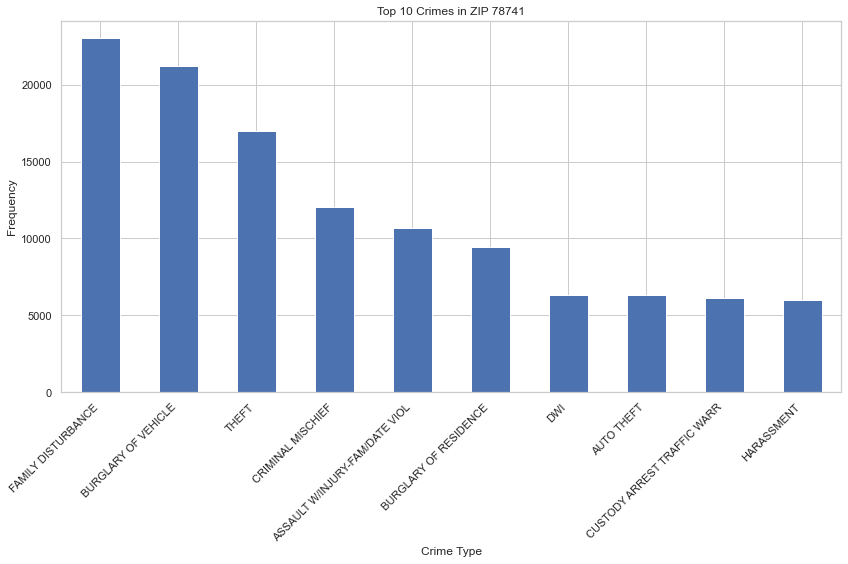

In [25]:
top_crimes_78741 = df_78741['Highest Offense Description'].value_counts().head(10)
top_crimes_78741.plot(kind='bar')
plt.title('Top 10 Crimes in ZIP 78741')
plt.ylabel('Frequency')
plt.xlabel('Crime Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



We have a similar top 10, with Family Disturbance taking #1.

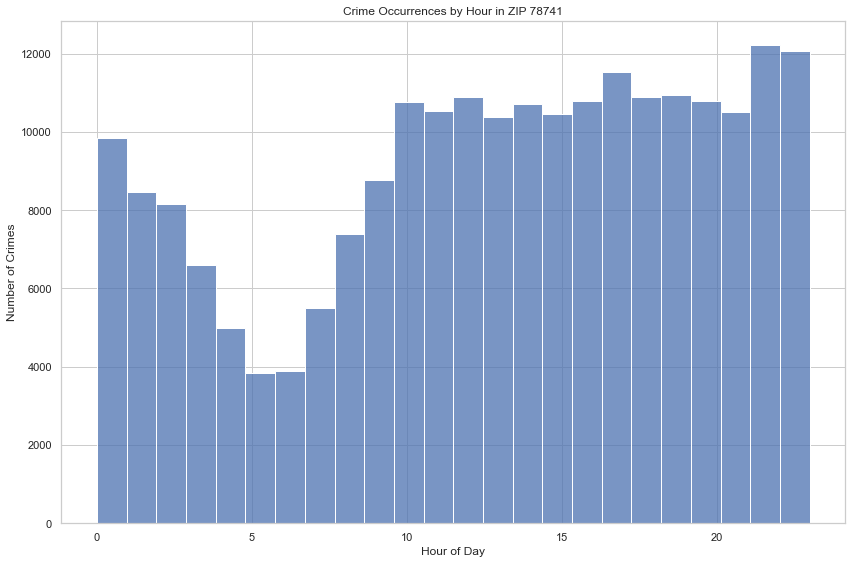

In [26]:
df_78741['Hour'] = df_78741['report_dt'].dt.hour
sns.histplot(df_78741['Hour'], bins=24, kde=False)
plt.title('Crime Occurrences by Hour in ZIP 78741')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()


We can see here that crime occurences follows our data closely except the spike around noon.

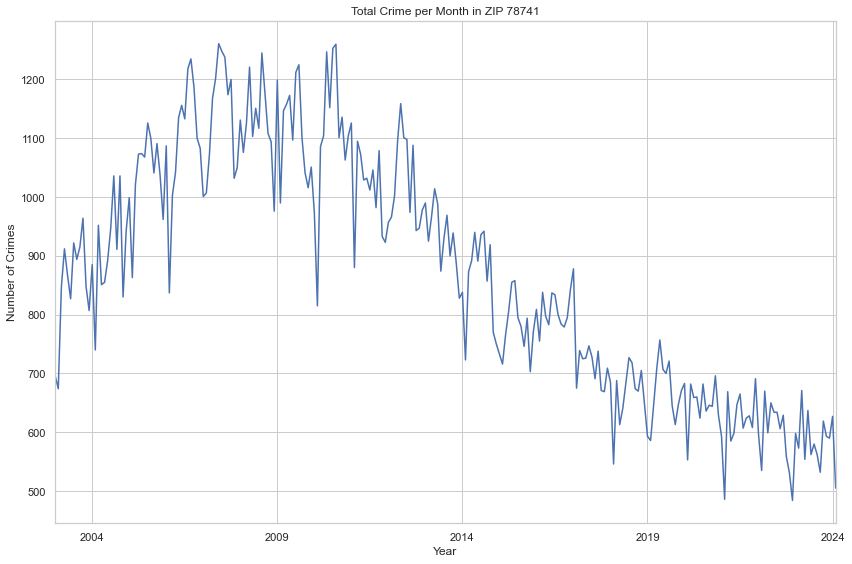

In [27]:
# using our datafram df_78741, show me a line graph of total crime per year against the 12 month moving average
df_78741['Year'] = df_78741['report_dt'].dt.year
df_78741['Month'] = df_78741['report_dt'].dt.month
df_78741['Day'] = df_78741['report_dt'].dt.day
df_78741['Date'] = pd.to_datetime(df_78741[['Year', 'Month', 'Day']])
df_78741 = df_78741.sort_values('Date')
df_78741['Total Crime'] = 1
df_78741 = df_78741.set_index('Date')
df_78741['Total Crime'].resample('M').sum().plot()

plt.title('Total Crime per Month in ZIP 78741')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()


Now in here, we can see that the crime levels in this area code has decreased drastically.

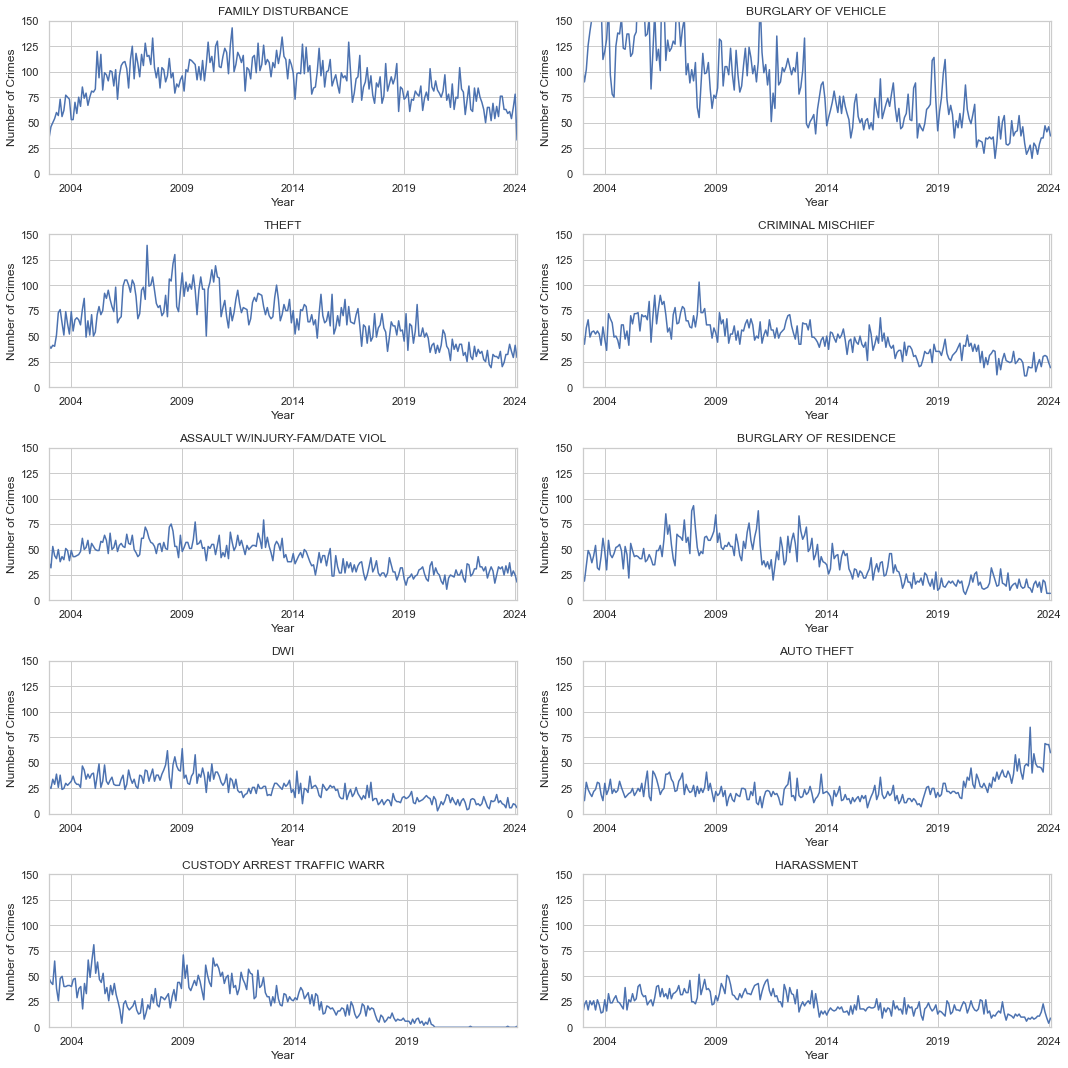

In [28]:
# do the same as above but for the top 10 crimes use subplots i dont want it graphed on the same graph
top_10_crimes = df_78741['Highest Offense Description'].value_counts().head(10).index
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
ax = ax.ravel()
for i, crime in enumerate(top_10_crimes):
    df_78741[df_78741['Highest Offense Description'] == crime]['Total Crime'].resample('M').sum().plot(ax=ax[i])
    ax[i].set_title(crime)
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Number of Crimes')
    ax[i].set_ylim(0, 150)
plt.tight_layout()
plt.show()




It seems most crimes (top 10) are decreasing, but autho theft is increasing! Some crimes are also more spiky than others and have much more slow or calm trends (not extremely positive or negative).

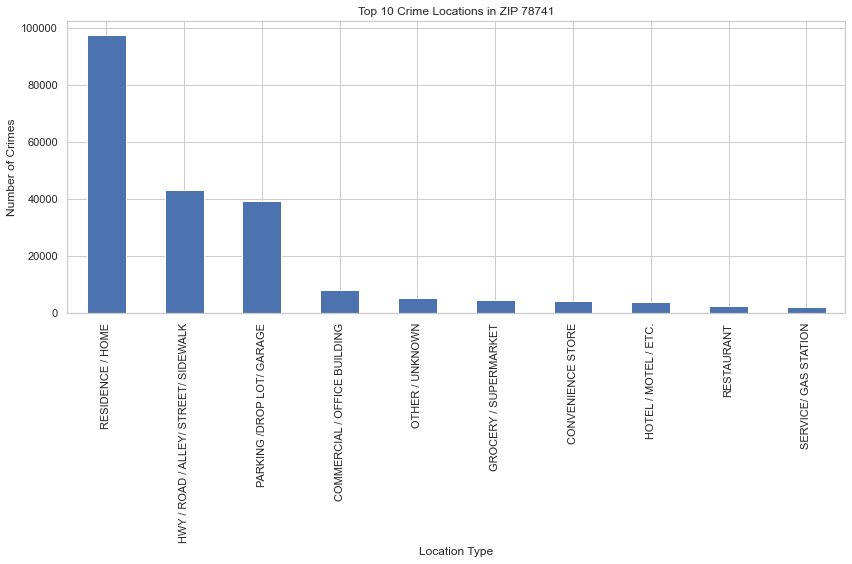

In [29]:
# using our dataframe df_78741, make a graph using location_type to show the top 10 locations crimes are committed
df_78741['Location Type'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Crime Locations in ZIP 78741')
plt.xlabel('Location Type')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

    

As we can see above the location of most crimes is the home, which makes sense since the most popular crime is family disturbance.

## Machine / Statistical Learning

Now that we know this lets look into if we can make some predictions about crime in the area.

First, lets predict on the "highest offense description" parameter.

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# Assuming df_78741 is your DataFrame filtered for ZIP code 78741 and year 2023
# and you have already executed:
# df_78741['occurred_dt'] = pd.to_datetime(df_78741['Occurred Date Time'], errors='coerce')
# df_78741['Year'] = df_78741['occurred_dt'].dt.year
# and other necessary preprocessing up to the feature selection

# For reproducibility, let's create a minimal reproducible example of your features and target encoding
features = df_78741[['Latitude', 'Longitude']]  # Example features, you should replace with your actual features
features.fillna(features.mean(), inplace=True)  # Replace NaN values with the mean for each column

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_78741['Highest Offense Description'])  # Your target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, y_encoded, test_size=0.2, random_state=42)

# Scale features to handle values too large for dtype('float32')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)  # Fit the model on scaled training data

# Predict and evaluate
predictions = model.predict(X_test_scaled)  # Make predictions on the scaled test data
# Find the unique labels in the test set and predictions
unique_labels = np.unique(np.concatenate((y_test, predictions)))

# Extract the corresponding target names for these unique labels
target_names_for_pred = label_encoder.inverse_transform(unique_labels)

# Use these target names in the classification report
print(classification_report(y_test, predictions, labels=unique_labels, target_names=target_names_for_pred))

                                               precision    recall  f1-score   support

                                 ABUSE OF 911       0.00      0.00      0.00         2
                   ABUSE OF OFFICIAL CAPACITY       0.00      0.00      0.00         1
               AGG ASLT ENHANC STRANGL/SUFFOC       0.00      0.00      0.00        35
                  AGG ASLT STRANGLE/SUFFOCATE       0.00      0.00      0.00       192
               AGG ASLT W/MOTOR VEH FAM/DAT V       0.00      0.00      0.00        11
                                  AGG ASSAULT       0.02      0.00      0.00       424
                AGG ASSAULT FAM/DATE VIOLENCE       0.00      0.00      0.00       225
                AGG ASSAULT ON PUBLIC SERVANT       0.00      0.00      0.00         7
                   AGG ASSAULT WITH MOTOR VEH       0.00      0.00      0.00        23
                            AGG FORCED SODOMY       0.00      0.00      0.00         2
                   AGG FORCED SODOMY OF CH

We recieved an accuracy of 0.18, which is rather low. Lets try to raise that.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# Assuming df_78741 is your DataFrame

# Select features and target variable
features = df_78741[['Latitude', 'Longitude']]  # Modify based on your dataset
features.fillna(features.mean(), inplace=True)  # Handling NaN values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_78741['Highest Offense Description'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute class weights
class_weights = 'balanced'  # This automatically adjusts weights inversely proportional to class frequencies

# Initialize and train the model with class weights
model = RandomForestClassifier(random_state=42, class_weight=class_weights, n_jobs=-1)  # n_jobs=-1 uses all available cores
model.fit(X_train_scaled, y_train)

# Predict and evaluate
predictions = model.predict(X_test_scaled)

# Correct way to obtain target names based on unique labels present in y_test and predictions
unique_labels = np.unique(np.concatenate((y_test, predictions)))
target_names = label_encoder.inverse_transform(unique_labels)

print(classification_report(y_test, predictions, labels=unique_labels, target_names=target_names))



                                               precision    recall  f1-score   support

                                 ABUSE OF 911       0.00      0.00      0.00         2
                   ABUSE OF OFFICIAL CAPACITY       0.00      0.00      0.00         1
               AGG ASLT ENHANC STRANGL/SUFFOC       0.01      0.03      0.01        35
                  AGG ASLT STRANGLE/SUFFOCATE       0.00      0.00      0.00       192
               AGG ASLT W/MOTOR VEH FAM/DAT V       0.00      0.00      0.00        11
                                  AGG ASSAULT       0.00      0.00      0.00       424
                AGG ASSAULT FAM/DATE VIOLENCE       0.00      0.00      0.00       225
                 AGG ASSAULT ON PEACE OFFICER       0.00      0.00      0.00         0
                AGG ASSAULT ON PUBLIC SERVANT       0.00      0.00      0.00         7
                   AGG ASSAULT WITH MOTOR VEH       0.00      0.00      0.00        23
                            AGG FORCED SOD

It seems this version of a random forrest did not work well, lets try using a  tuning.

In [34]:
# Convert 'Report Date Time' to datetime format if not already done
df_78741['Report Date Time'] = pd.to_datetime(df_78741['Report Date Time'])

# Filter for the year 2023
df_2023 = df_78741[df_78741['Report Date Time'].dt.year == 2024]

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import numpy as np


# Example feature selection
features = df_2023[['Latitude', 'Longitude']]
features.fillna(features.mean(), inplace=True)  # Handling NaN values

# Encode your target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_2023['Highest Offense Description'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setup the RandomForestClassifier and GridSearchCV
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    # Add more parameters here if needed
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model using GridSearchCV to find the best parameters
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
predictions = grid_search.best_estimator_.predict(X_test_scaled)

# Find the unique labels in the test set and predictions
unique_labels = np.unique(np.concatenate((y_test, predictions)))

# Extract the corresponding target names for these unique labels
target_names_for_pred = label_encoder.inverse_transform(unique_labels)

# Use these target names in the classification report
print(classification_report(y_test, predictions, labels=unique_labels, target_names=target_names_for_pred))


Best parameters found:  {'max_depth': 10, 'n_estimators': 100}
                                               precision    recall  f1-score   support

                  AGG ASLT STRANGLE/SUFFOCATE       0.00      0.00      0.00         1
                                  AGG ASSAULT       0.00      0.00      0.00         1
                AGG ASSAULT FAM/DATE VIOLENCE       0.00      0.00      0.00         2
                    AGG ROBBERY/DEADLY WEAPON       0.00      0.00      0.00         1
                    ARSON-VIOL CITY ORDINANCE       0.00      0.00      0.00         1
                           ASSAULT BY CONTACT       0.00      0.00      0.00         4
                ASSAULT BY CONTACT FAM/DATING       0.00      0.00      0.00         2
                            ASSAULT BY THREAT       0.00      0.00      0.00         4
                 ASSAULT BY THREAT FAM/DATING       0.00      0.00      0.00         1
                    ASSAULT ON PUBLIC SERVANT       0.00      0.00

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# Assuming df_2023 is your DataFrame filtered for ZIP code 78741 and year 2023
# Make sure you've done necessary preprocessing before this step

# For the sake of example, let's use Latitude and Longitude as initial features
features = df_2023[['Latitude', 'Longitude']]  # Add other features you initially consider
features.fillna(features.mean(), inplace=True)  # Handling NaN values

# Encode your target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_2023['Highest Offense Description'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train_scaled, y_train)

# Evaluate feature importance
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# Based on the feature importances, decide which features to keep. Assume we drop some features
# features_dropped = df_2023[['Latitude', 'Longitude']]  # This is an example, adjust based on actual analysis

# Proceed with your refined feature selection
# X_train, X_test, y_train, y_test = train_test_split(features_dropped, y_encoded, test_size=0.2, random_state=42)
# Repeat the scaling, fitting with GridSearchCV, and evaluation steps here


Feature importances: [0.49783149 0.50216851]


In [41]:
df = pd.read_csv('Crime_Reports.csv')
df.dtypes

Incident Number                  int64
Highest Offense Description     object
Highest Offense Code             int64
Family Violence                 object
Occurred Date Time              object
Occurred Date                   object
Occurred Time                  float64
Report Date Time                object
Report Date                     object
Report Time                    float64
Location Type                   object
Address                         object
Zip Code                       float64
Council District               float64
APD Sector                      object
APD District                    object
PRA                             object
Census Tract                   float64
Clearance Status                object
Clearance Date                  object
UCR Category                    object
Category Description            object
X-coordinate                   float64
Y-coordinate                   float64
Latitude                       float64
Longitude                

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Load the data
df = pd.read_csv('Crime_Reports.csv')

# Convert 'Occurred Date Time' to datetime format
df['Occurred Date Time'] = pd.to_datetime(df['Occurred Date Time'], errors='coerce')

# Extract the year from 'Occurred Date Time'
df['Year'] = df['Occurred Date Time'].dt.year

# Extract Hour, Day, and Month
df['Hour'] = df['Occurred Date Time'].dt.hour
df['Day'] = df['Occurred Date Time'].dt.day
df['Month'] = df['Occurred Date Time'].dt.month

# Filter by ZIP code 78741 and the year 2023
df_filtered = df[(df['Zip Code'] == 78741) & (df['Year'] == 2023)]

# Handling NaN values
# For numerical features, replace NaNs with the median of the column
for feature in ['Latitude', 'Longitude', 'Hour', 'Day', 'Month']:
    df_filtered[feature] = df_filtered[feature].fillna(df_filtered[feature].median())

# Assuming 'Council District', 'APD Sector', and 'APD District' are categorical,
# replace NaNs with a placeholder string 'unknown'
for feature in ['Council District', 'APD Sector', 'APD District']:
    df_filtered[feature] = df_filtered[feature].fillna('unknown')

# Feature and target selection including newly extracted features
X = df_filtered[['Latitude', 'Longitude', 'Hour', 'Day', 'Month', 'Council District', 'APD Sector', 'APD District']]
y = df_filtered['Highest Offense Description']

# Preprocessing: Encoding categorical variables and scaling numerical features
categorical_features = ['Council District', 'APD Sector', 'APD District']
numerical_features = ['Latitude', 'Longitude', 'Hour', 'Day', 'Month']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model.fit(X_train, y_train)

# Model evaluation
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


                                               precision    recall  f1-score   support

               AGG ASLT ENHANC STRANGL/SUFFOC       0.00      0.00      0.00         0
                  AGG ASLT STRANGLE/SUFFOCATE       0.00      0.00      0.00         8
               AGG ASLT W/MOTOR VEH FAM/DAT V       0.00      0.00      0.00         1
                                  AGG ASSAULT       0.17      0.06      0.09        31
                AGG ASSAULT FAM/DATE VIOLENCE       0.00      0.00      0.00        11
                                     AGG RAPE       0.00      0.00      0.00         1
                          AGG RAPE OF A CHILD       0.00      0.00      0.00         1
                    AGG ROBBERY/DEADLY WEAPON       0.00      0.00      0.00         8
                                        ARSON       0.00      0.00      0.00         1
                      ARSON-CRIMINAL MISCHIEF       0.00      0.00      0.00         2
               ASSAULT  CONTACT-SEXUAL NAT

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Load the data
df = pd.read_csv('Crime_Reports.csv')

# Convert 'Occurred Date Time' to datetime format if not already done
df['Occurred Date Time'] = pd.to_datetime(df['Occurred Date Time'], errors='coerce')

# Extract the year, hour, day, and month from 'Occurred Date Time'
df['Year'] = df['Occurred Date Time'].dt.year
df['Hour'] = df['Occurred Date Time'].dt.hour
df['Day'] = df['Occurred Date Time'].dt.day
df['Month'] = df['Occurred Date Time'].dt.month

# Filter by ZIP code 78741 and the year 2023
df_filtered = df[(df['Zip Code'] == 78741) & (df['Year'] == 2023)]

# Define features and target variable based on your DataFrame
X = df_filtered[['Latitude', 'Longitude', 'Hour', 'Day', 'Month', 'Council District', 'APD Sector', 'APD District']]
y = df_filtered['Highest Offense Description']

# Handling missing values
X.fillna(X.mean(), inplace=True)
y.dropna(inplace=True)

# Encoding categorical variables and scaling numerical features
categorical_features = ['Council District', 'APD Sector', 'APD District']
numerical_features = ['Latitude', 'Longitude', 'Hour', 'Day', 'Month']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# Get feature importances from the RandomForestClassifier
feature_importances = model.named_steps['classifier'].feature_importances_

# Combine feature names and their importance scores
features_combined = numerical_features + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_features))
importance_scores = zip(features_combined, feature_importances)

# Sort the features by importance
sorted_features = sorted(importance_scores, key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
print("Feature importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

# Based on the output, decide which features might be considered not significant.



                                               precision    recall  f1-score   support

               AGG ASLT ENHANC STRANGL/SUFFOC       0.00      0.00      0.00         0
                  AGG ASLT STRANGLE/SUFFOCATE       0.00      0.00      0.00         8
               AGG ASLT W/MOTOR VEH FAM/DAT V       0.00      0.00      0.00         1
                                  AGG ASSAULT       0.13      0.06      0.09        31
                AGG ASSAULT FAM/DATE VIOLENCE       0.00      0.00      0.00        11
                                     AGG RAPE       0.00      0.00      0.00         1
                          AGG RAPE OF A CHILD       0.00      0.00      0.00         1
                    AGG ROBBERY/DEADLY WEAPON       0.00      0.00      0.00         8
                                        ARSON       0.00      0.00      0.00         1
                      ARSON-CRIMINAL MISCHIEF       0.00      0.00      0.00         2
               ASSAULT  CONTACT-SEXUAL NAT